In [0]:
from fastai.tabular import *

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2019-05-04 04:23:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K   689KB/s    in 0.8s    

2019-05-04 04:23:18 (689 KB/s) - ‘bank.zip’ saved [579043/579043]

--2019-05-04 04:23:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   531KB/s    in 0.8s   

In [0]:
os.makedirs('/content/data/bank/',exist_ok=True)

In [4]:
!unzip /content/\*.zip -d /content/data/bank/

Archive:  /content/bank.zip
  inflating: /content/data/bank/bank-full.csv  
  inflating: /content/data/bank/bank-names.txt  
  inflating: /content/data/bank/bank.csv  

Archive:  /content/bank-additional.zip
   creating: /content/data/bank/bank-additional/
  inflating: /content/data/bank/bank-additional/.DS_Store  
   creating: /content/data/bank/__MACOSX/
   creating: /content/data/bank/__MACOSX/bank-additional/
  inflating: /content/data/bank/__MACOSX/bank-additional/._.DS_Store  
  inflating: /content/data/bank/bank-additional/.Rhistory  
  inflating: /content/data/bank/bank-additional/bank-additional-full.csv  
  inflating: /content/data/bank/bank-additional/bank-additional-names.txt  
  inflating: /content/data/bank/bank-additional/bank-additional.csv  
  inflating: /content/data/bank/__MACOSX/._bank-additional  

2 archives were successfully processed.


In [0]:
path ='/content/data/bank/'

In [25]:
df_bank = pd.read_csv(f'{path}bank-full.csv',delimiter=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
df_bank.shape,df_bank.columns

((45211, 17),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

In [27]:
df_bank_add = pd.read_csv(f'{path}/bank-additional/bank-additional-full.csv',delimiter=';')
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df_bank_add.shape, df_bank_add.columns

((41188, 21),
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'))

# Mege two tables

In [0]:
def join_df(left,right,left_on,right_on=None,suffix='_y'):
    if right_on is None: right_on =left_on
    return left.merge(right,how='left',left_on=left_on,right_on=right_on,
                     suffixes=("",suffix))

In [0]:
left_on = ['age', 'job', 'marital', 'education', 'default', 
           'housing', 'loan','contact', 'month','duration', 
           'campaign', 'pdays','previous', 'poutcome','y']

In [0]:
df_full = join_df(df_bank,df_bank_add,left_on)

In [32]:
len(df_full[df_full.age.isnull()])

0

In [33]:
df_full.euribor3m.value_counts()

Series([], Name: euribor3m, dtype: int64)

#df_bank

## Plot columns

In [0]:
from pandas.api.types import is_numeric_dtype
def plot_multi_hist(df):
    n_subplot = len(df.columns.to_list())
    n_rows = math.ceil(n_subplot/2)
    fig = plt.figure(figsize=(25,20))
    for i,col in enumerate(df.columns.to_list()):
        ax = fig.add_subplot(n_rows,3,i+1)
        if is_numeric_dtype(df[col]):
            df[col].hist(bins=10,ax=ax)
        else:
            df_convert = pd.DataFrame(df[col].value_counts())
            ax.bar(df_convert.index,df_convert[col])
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

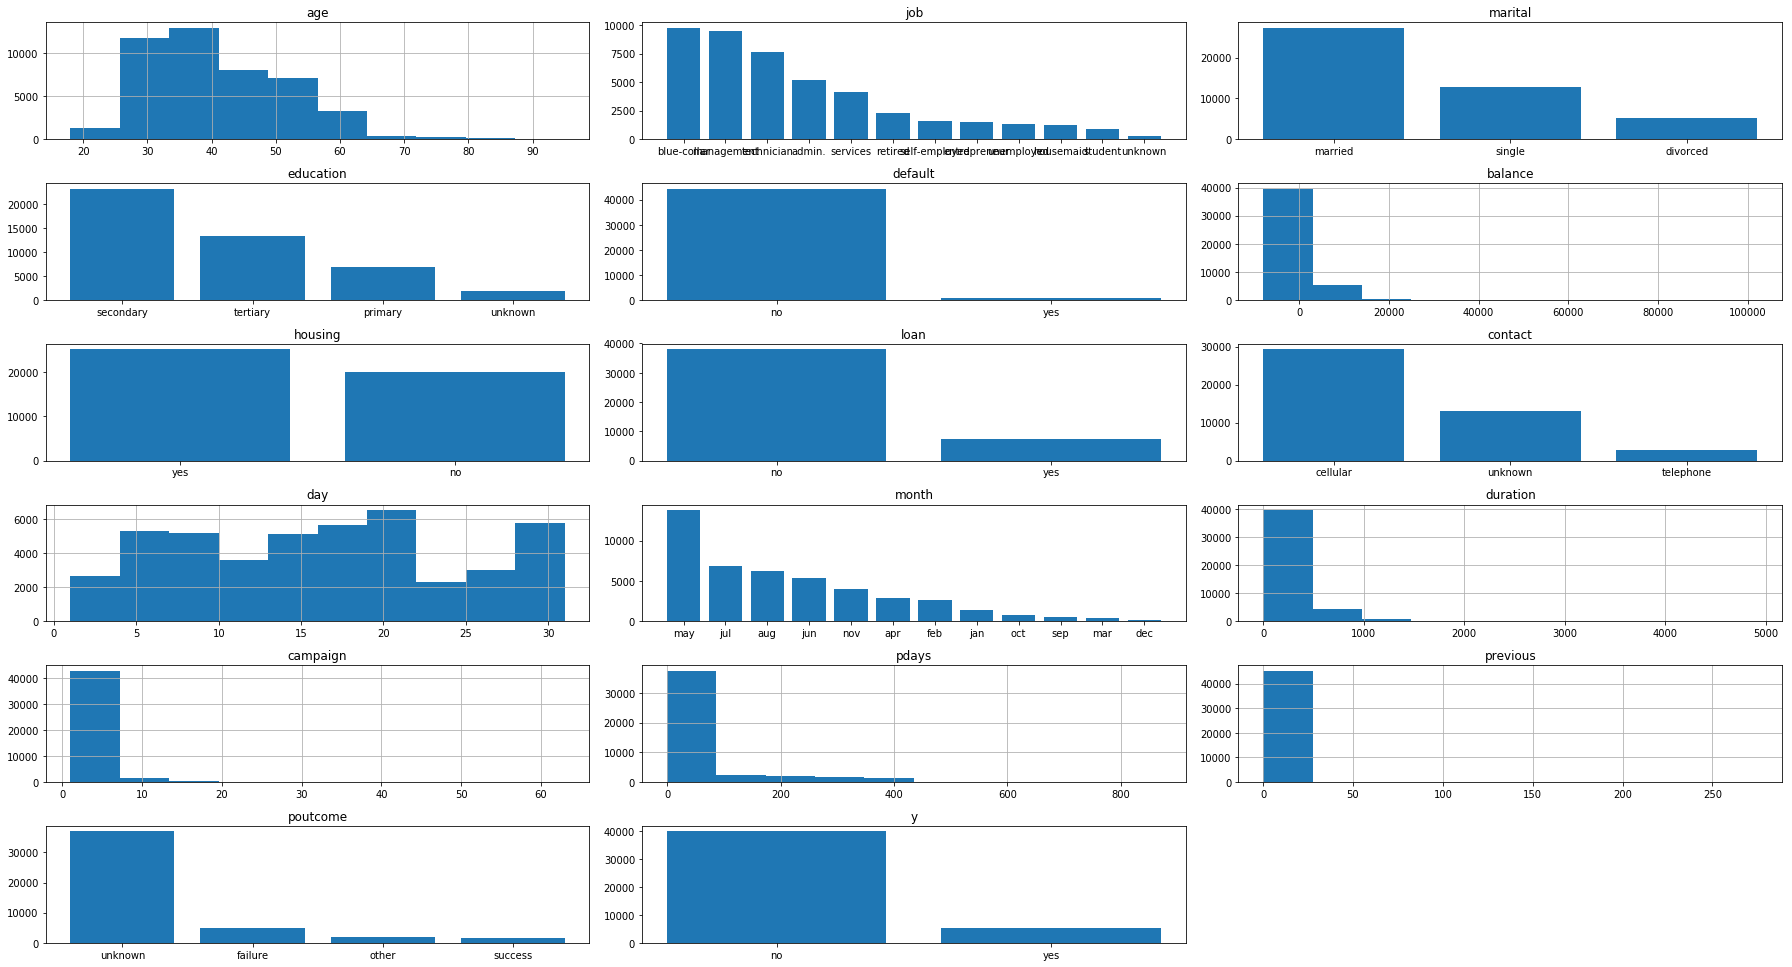

In [35]:
plot_multi_hist(df_bank)

##Pre-processing

###Age

In [36]:
df_bank['age_cat'] = pd.cut(df_bank.age,5)
df_bank['age_cat'].value_counts()

(33.4, 48.8]      20940
(17.923, 33.4]    13083
(48.8, 64.2]      10378
(64.2, 79.6]        680
(79.6, 95.0]        130
Name: age_cat, dtype: int64

In [0]:
df_bank.loc[df_bank['age']<33.4,['age']]=0
df_bank.loc[(df_bank['age']>=33.4)&(df_bank['age']<48.8),['age']]=1
df_bank.loc[(df_bank['age']>=48.8)&(df_bank['age']<64.2),['age']]=2
df_bank.loc[df_bank['age']>64.2,['age']]=3


In [38]:
df_bank['age'].value_counts()

1    20940
0    13083
2    10378
3      810
Name: age, dtype: int64

In [0]:
df_bank.drop('age_cat',axis=1,inplace=True);

###day

In [85]:
df_bank['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

##Model 

###Deep Learning

In [0]:
cat_vars= ['age', 'job', 'marital', 'education', 'default','housing',
        'loan', 'contact', 'day', 'month','campaign', 'pdays',
        'previous', 'poutcome',]
cont_vars = ['balance','duration']

In [43]:
dep_var ='y'
df_bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [0]:
procs = [FillMissing,Categorify,Normalize]

In [0]:
data = (TabularList.from_df(df_bank,path=path,cat_names=cat_vars,cont_names=cont_vars,procs=procs)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_df(cols=dep_var)
       .databunch())

#### Simple version: 2 hidden layers

In [0]:
learn = tabular_learner(data,layers=[1000,500],metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


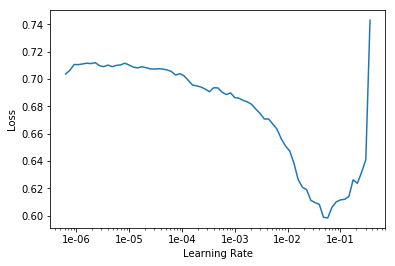

In [45]:
learn.lr_find()
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(5,1e-3,wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.254189,0.227870,0.898806,00:06
1,0.233271,0.226883,0.900243,00:06
2,0.227224,0.213518,0.901239,00:07
3,0.202119,0.214709,0.898806,00:06
4,0.187089,0.213030,0.903561,00:06


In [47]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(13, 7)
    (2): Embedding(4, 3)
    (3): Embedding(5, 4)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(4, 3)
    (8): Embedding(32, 11)
    (9): Embedding(13, 7)
    (10): Embedding(49, 14)
    (11): Embedding(538, 54)
    (12): Embedding(40, 13)
    (13): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=135, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=2, bias=True)
  )
)

####Fine-tuned: 3 hidden layers, setting dropout

In [0]:
learn = tabular_learner(data,layers=[1000,750,500],ps=[0.001,0.005,0.01],emb_drop=0.03,metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


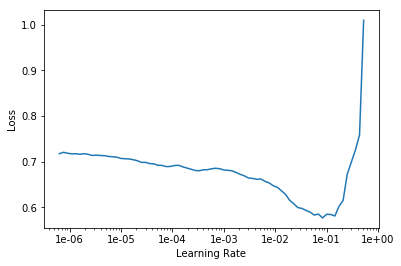

In [88]:
learn.lr_find()
learn.recorder.plot()

In [89]:
learn.fit_one_cycle(5, 1e-4,wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.534665,0.511560,0.827251,00:07
1,0.258235,0.245149,0.900464,00:06
2,0.234279,0.225295,0.899580,00:06
3,0.205021,0.215968,0.903340,00:06
4,0.202812,0.215807,0.903119,00:06


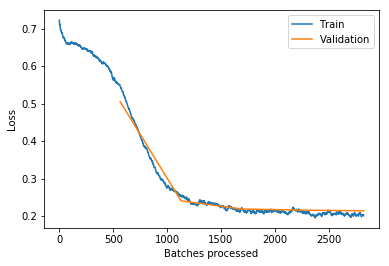

In [59]:
learn.recorder.plot_losses()

In [72]:
data.show_batch()

age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration,target
1,unknown,married,tertiary,no,no,no,unknown,19,jun,1,-1,0,unknown,0.1847,0.4914,no
0,services,single,secondary,no,yes,no,cellular,13,may,2,-1,0,unknown,-0.3753,-0.3479,no
1,technician,married,tertiary,no,yes,no,cellular,14,aug,4,102,5,failure,3.3940,0.2130,no
1,management,married,tertiary,no,no,no,cellular,15,jun,2,-1,0,unknown,0.7009,-0.2976,yes
0,management,single,tertiary,no,no,yes,cellular,7,jul,1,-1,0,unknown,-0.3374,1.0716,no


### Random Forest

In [0]:
#@title Fastai structured

#from .imports import *

#from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz

def set_plot_sizes(sml, med, big):
    plt.rc('font', size=sml)          # controls default text sizes
    plt.rc('axes', titlesize=sml)     # fontsize of the axes title
    plt.rc('axes', labelsize=med)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('legend', fontsize=sml)    # legend fontsize
    plt.rc('figure', titlesize=big)  # fontsize of the figure title

def parallel_trees(m, fn, n_jobs=8):
        return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

def combine_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

def add_datepart(df, fldname, drop=True, time=False, errors="raise"):	
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

def is_date(x): return np.issubdtype(x.dtype, np.datetime64)

def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.
    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category {a : 1, b : 2}
    >>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
    >>> apply_cats(df2, df)
           col1 col2
        0     1    b
        1     2    a
        2     3    a
    now the type of col is category {a : 1, b : 2}
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = c.astype('category').cat.as_ordered()
            df[n].cat.set_categories(trn[n].cat.categories, ordered=True, inplace=True)

def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    Parameters:
    -----------
    df: The data frame that will be changed.
    col: The column of data to fix by filling in missing data.
    name: The name of the new filled column in df.
    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1

def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

def get_nn_mappers(df, cat_vars, contin_vars):
    # Replace nulls with 0 for continuous, "" for categorical.
    for v in contin_vars: df[v] = df[v].fillna(df[v].max()+100,)
    for v in cat_vars: df[v].fillna('#NA#', inplace=True)

    # list of tuples, containing variable and instance of a transformer for that variable
    # for categoricals, use LabelEncoder to map to integers. For continuous, standardize
    cat_maps = [(o, LabelEncoder()) for o in cat_vars]
    contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [0]:
df_bank1 = df_bank.copy()

In [0]:
train_cats(df_bank1)

In [0]:
df,y,nas = proc_df(df_bank1,'y')

In [93]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,2,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4
1,1,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4
2,0,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4
3,1,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4
4,0,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [99]:
x_train.shape,x_test.shape

((36168, 16), (9043, 16))

In [100]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,n_estimators=100)
m.fit(x_train,y_train)
m.score(x_train,y_train),m.score(x_test,y_test)

(1.0, 0.9018024991706293)

In [102]:
m = RandomForestClassifier(n_jobs=-1,n_estimators=100,min_samples_leaf=10)
m.fit(x_train,y_train)
m.score(x_train,y_train),m.score(x_test,y_test)

(0.929219199292192, 0.9006966714585868)

#df_bank_add

In [105]:
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##Plot columns

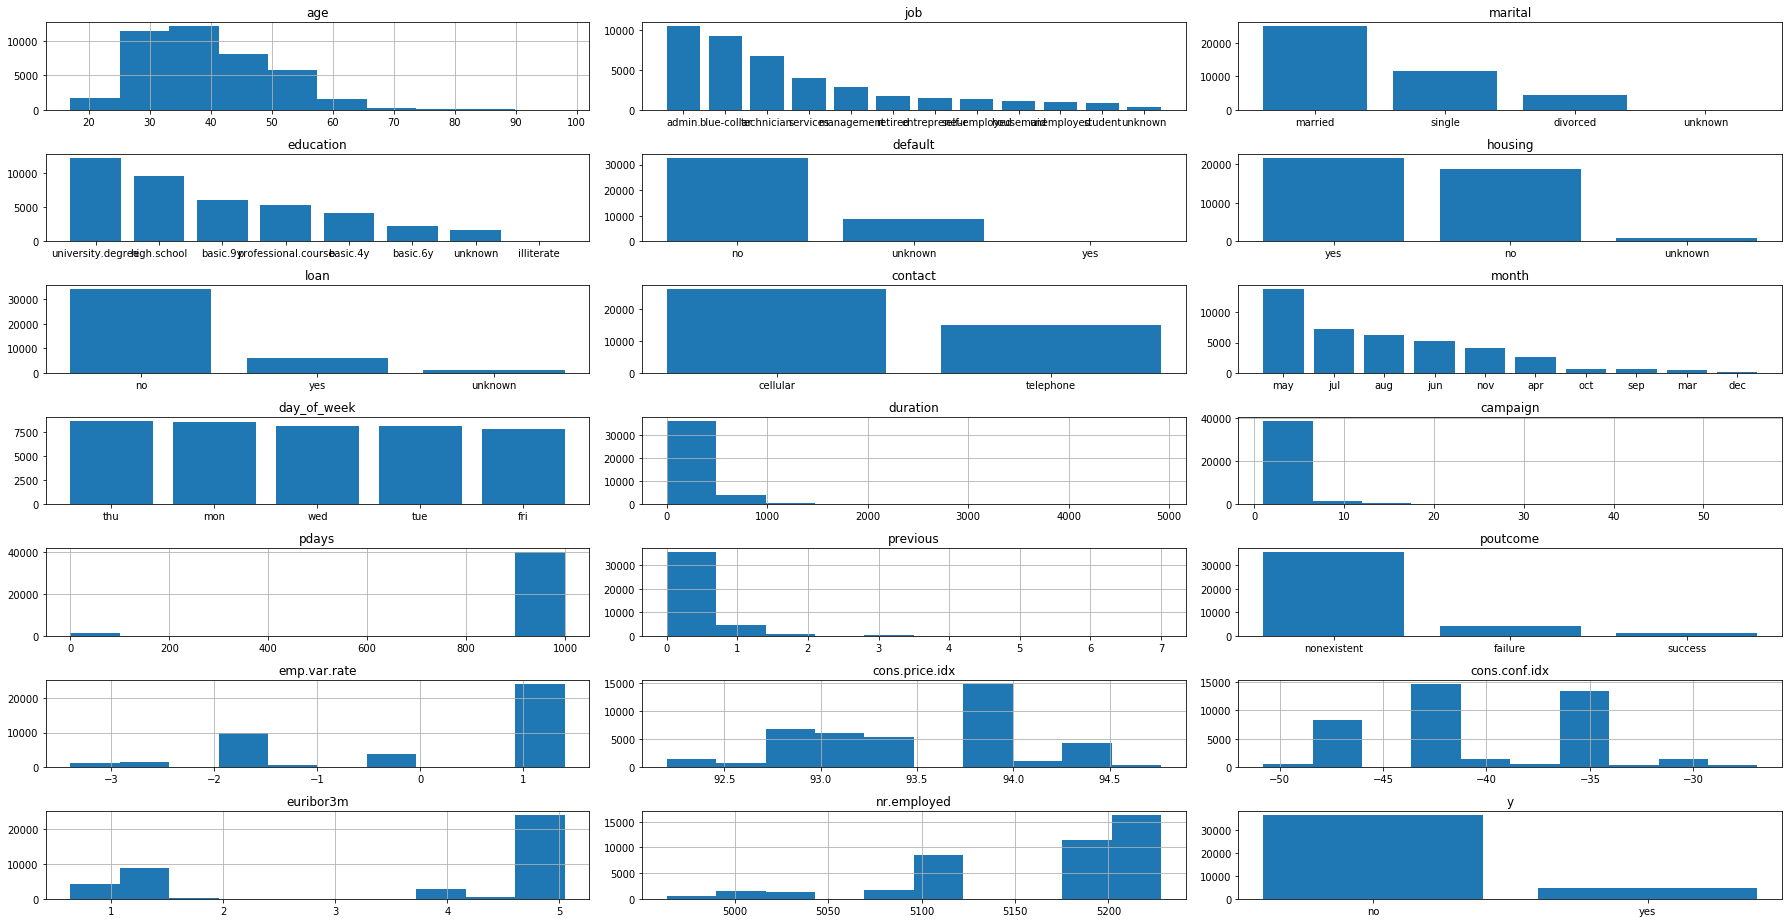

In [103]:
plot_multi_hist(df_bank_add)

##Pre processing


###Age

In [106]:
df_bank_add['age_cat']=pd.cut(df_bank_add['age'],4)
df_bank_add['age_cat'].value_counts()

(16.919, 37.25]    19768
(37.25, 57.5]      19188
(57.5, 77.75]       2041
(77.75, 98.0]        191
Name: age_cat, dtype: int64

In [0]:
df_bank_add.loc[df_bank_add.age<37.25,['age']]=0
df_bank_add.loc[(df_bank_add.age>=37.25)&(df_bank_add.age<57.5),['age']]=1
df_bank_add.loc[(df_bank_add.age>=57.5)&(df_bank_add.age<77.75),['age']]=2
df_bank_add.loc[df_bank_add.age>=77.75,['age']]=3

In [0]:
df_bank_add.drop('age_cat',axis=1,inplace=True)

##Model


###Deep Learning

In [109]:
df_bank_add.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [0]:
cat_vars= ['age', 'job', 'marital', 'education', 'default','housing',
          'contact', 'month','day_of_week','campaign', 'pdays',
        'previous', 'poutcome',]
cont_vars = ['duration','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [0]:
data = (TabularList.from_df(df_bank_add,path=path,cat_names=cat_vars,cont_names=cont_vars,procs=procs)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_df(cols=dep_var)
       .databunch())

In [0]:
learn = tabular_learner(data,layers=[1000,750,500],ps=[0.001,0.005,0.01],emb_drop=0.03,metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


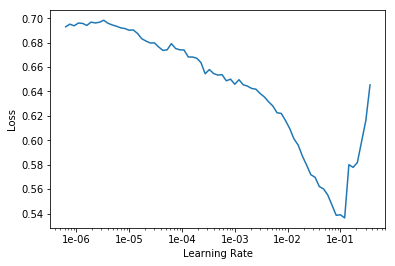

In [115]:
learn.lr_find()
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(5,1e-4,wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.517942,0.491954,0.883331,00:06
1,0.241961,0.228472,0.910647,00:06
2,0.197646,0.196568,0.910161,00:06
3,0.185703,0.185842,0.913075,00:06
4,0.182240,0.183343,0.911861,00:06
